In [24]:
import pandas as pd
import numpy as np

In [25]:
import numpy

newArray = numpy.random.randint(601, 609, size=3000)

print(newArray)

[607 608 606 ... 603 602 602]


In [26]:
#newArray=newArray/1000

In [27]:
newArray

array([607, 608, 606, ..., 603, 602, 602])

In [28]:
df=pd.read_csv('array_ random.csv')

In [51]:
df_train=df[0:4000]
df_test=df[4000:4200]

In [54]:
# df_train

In [55]:
# df_test[0:]

In [30]:
#New array is created with value between 0.601 to 0.609 with size 3000
newArray.shape

newArray_train=newArray[0:2900]
newArray_test=newArray[2900:2999]

In [31]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler(feature_range=(0,1))

data_scaled_array=sc.fit_transform(df_train)

In [32]:
data_scaled_array[102]

array([0.375])

In [33]:
X_train=[]
y_train=[]

for i in range(100,3999):
    X_train.append(data_scaled_array[i-100:i,0])
    y_train.append(data_scaled_array[i,0])
    
X_train,y_train=np.array(X_train),y_train

In [34]:
X_train[2:3]

array([[0.   , 0.5  , 0.   , 0.   , 0.375, 0.   , 0.875, 0.625, 0.25 ,
        0.5  , 0.125, 0.5  , 1.   , 0.375, 0.875, 0.125, 0.375, 0.75 ,
        0.875, 1.   , 0.125, 0.375, 1.   , 0.   , 1.   , 0.   , 0.625,
        0.75 , 0.125, 0.625, 1.   , 0.875, 0.875, 0.75 , 0.   , 0.875,
        0.25 , 0.375, 0.25 , 0.875, 0.5  , 0.25 , 0.375, 1.   , 0.25 ,
        0.75 , 0.25 , 1.   , 0.625, 0.75 , 0.375, 0.625, 0.   , 0.375,
        0.125, 0.375, 0.125, 1.   , 0.625, 0.125, 0.   , 0.375, 0.   ,
        0.625, 0.625, 0.25 , 0.875, 0.5  , 0.125, 0.875, 1.   , 0.   ,
        0.   , 1.   , 1.   , 0.125, 0.125, 0.375, 0.5  , 0.125, 0.875,
        0.875, 0.5  , 0.25 , 0.25 , 0.875, 0.5  , 0.   , 0.75 , 0.25 ,
        0.375, 0.   , 1.   , 0.625, 0.5  , 0.25 , 1.   , 0.625, 0.   ,
        0.625]])

In [35]:
y_train[0:5]

[0.0, 0.625, 0.375, 0.5, 0.25]

In [36]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [38]:
regressor=Sequential()

In [39]:

regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))

regressor.add(Dropout(0.2))

In [40]:
#2nd LSTM Layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2)) 

In [41]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2)) 

In [42]:
regressor.add(LSTM(units=50, return_sequences=False)) #since this is the last LSTM layer
regressor.add(Dropout(0.2)) 

In [43]:
regressor.add(Dense(units=1))

In [44]:
regressor.compile(optimizer='adam',loss='mean_squared_error')


In [63]:
model = Sequential()
model.add(
    LSTM(1, input_shape=(X_train.shape[1], 1), dropout=0.4,
         return_sequences=False))

#-----------------------Compiling the Model-------------------------------------------#
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())
# train LSTM
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
 - 10s - loss: 0.2025
Epoch 2/10
 - 8s - loss: 0.1220
Epoch 3/10
 - 9s - loss: 0.1092
Epoch 4/10
 - 8s - loss: 0.1074
Epoch 5/10
 - 8s - loss: 0.1069
Epoch 6/10
 - 8s - loss: 0.1065
Epoch 7/10
 - 9s - loss: 0.1064
Epoch 8/10
 - 8s - loss: 0.1057
Epoch 9/10
 - 10s - loss: 0.1056
Epoch 10/10
 - 9s - loss: 0.1055


In [64]:
#regressor.fit(X_train,y_train, epochs = 10, batch_size=32)

In [65]:
dataset_total= pd.concat((df_train,df_test),axis=0)
inputs= dataset_total[len(dataset_total) -len(df_test)-100:].values#4200-200-100= 1198
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

In [66]:
X_test=[]
for i in range(100,199):#Lower bound and upper bound 60+20
    X_test.append(inputs[i-100:i,0]) #Holding 60 values as memory
#Converting to numpy array
X_test=np.array(X_test)
#adding the dimension
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Predicted values
predicted_stock_price=model.predict(X_test)
#Inversing the transformation
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

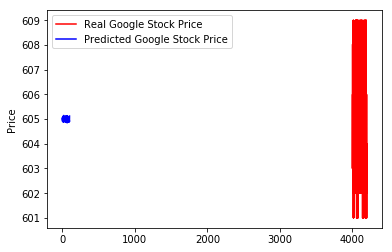

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df_test,color = 'red', label='Real Google Stock Price')
plt.plot(predicted_stock_price,color = 'blue', label='Predicted Google Stock Price')
plt.ylabel('Price')
plt.legend()
plt.show()